<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/Sep9/Ejercicio_9_sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [77]:
from pandas.core.api import DataFrame
#Data taken from https://www.kaggle.com/datasets/goyalshalini93/car-data
df=pd.read_csv("/content/drive/MyDrive/Cosas ML/CarPrice_Assignment.csv")

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
numeric_data = df.select_dtypes(include=[np.number])
X_categorical = df.select_dtypes(exclude=[np.number])

In [6]:
numeric_data

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
X_categorical

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [8]:
Y = numeric_data['price']

In [9]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [10]:
X_numeric= numeric_data.drop(columns=['price'])

In [11]:
Labels=["car_ID",	"symboling", 	"wheelbase",	"carlength",	"carwidth",	"carheight"	, "curbweight"	, "enginesize"	,"boreratio"	,"stroke"	, "compressionratio"	, "horsepower"	,"peakrpm"	,"citympg"	,"highwaympg"]

In [12]:
X_numeric

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [13]:
X_numeric.iloc[:,3]

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: carlength, Length: 205, dtype: float64

In [14]:
delim_whitespace=True

In [15]:
Labels

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

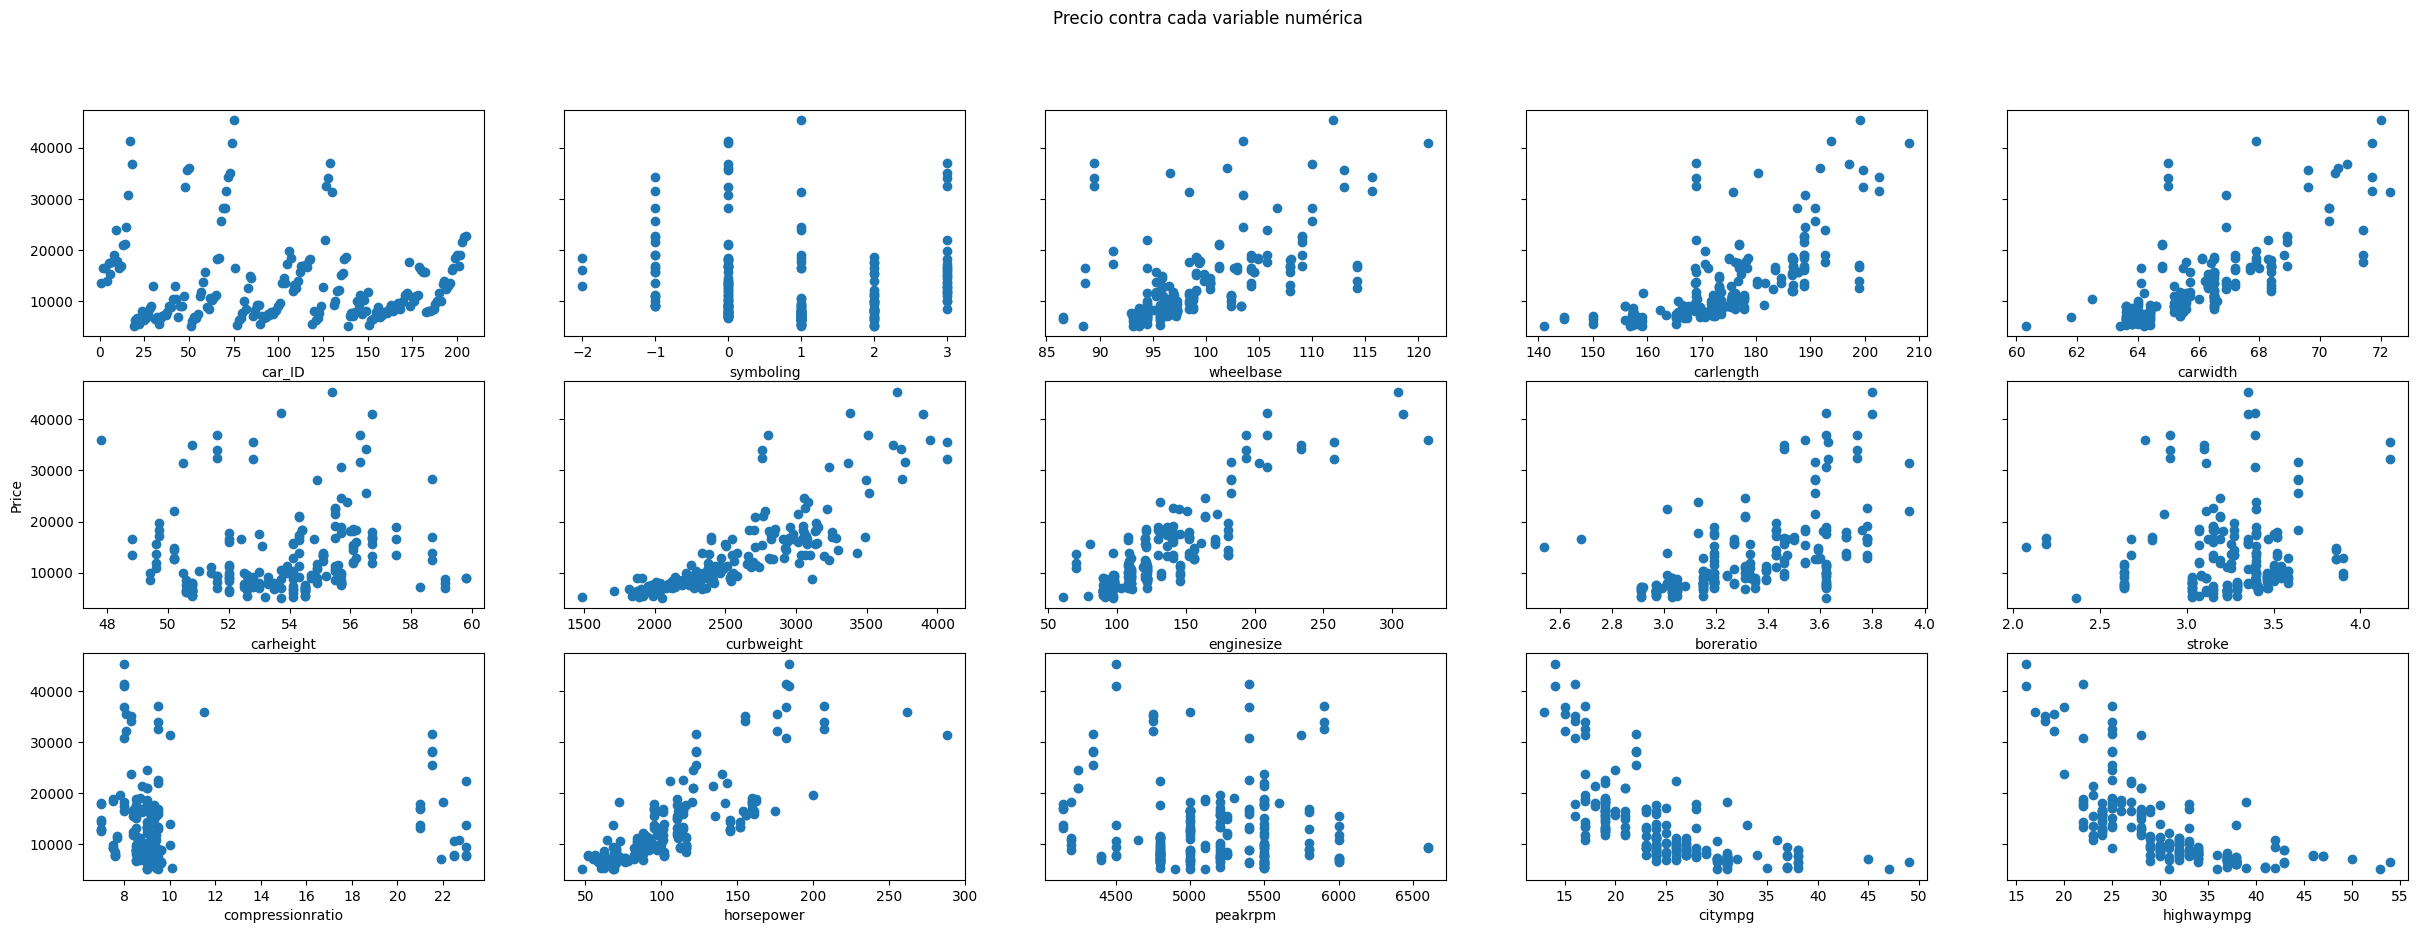

In [16]:
fig,ax=plt.subplots(3,5,figsize=(30, 10),sharey=True)
k=0
for i in range(len(ax)):
  for j in range(5):
    ax[i][j].scatter(X_numeric.iloc[:,k],Y)
    ax[i][j].set_xlabel(Labels[k]);
    k+=1
ax[1][0].set_ylabel("Price");

fig.suptitle("Precio contra cada variable numérica")
plt.show()

In [17]:
Labels[0]

'car_ID'

In [18]:
Labelscat = X_categorical.columns
Lad = Labelscat.tolist()

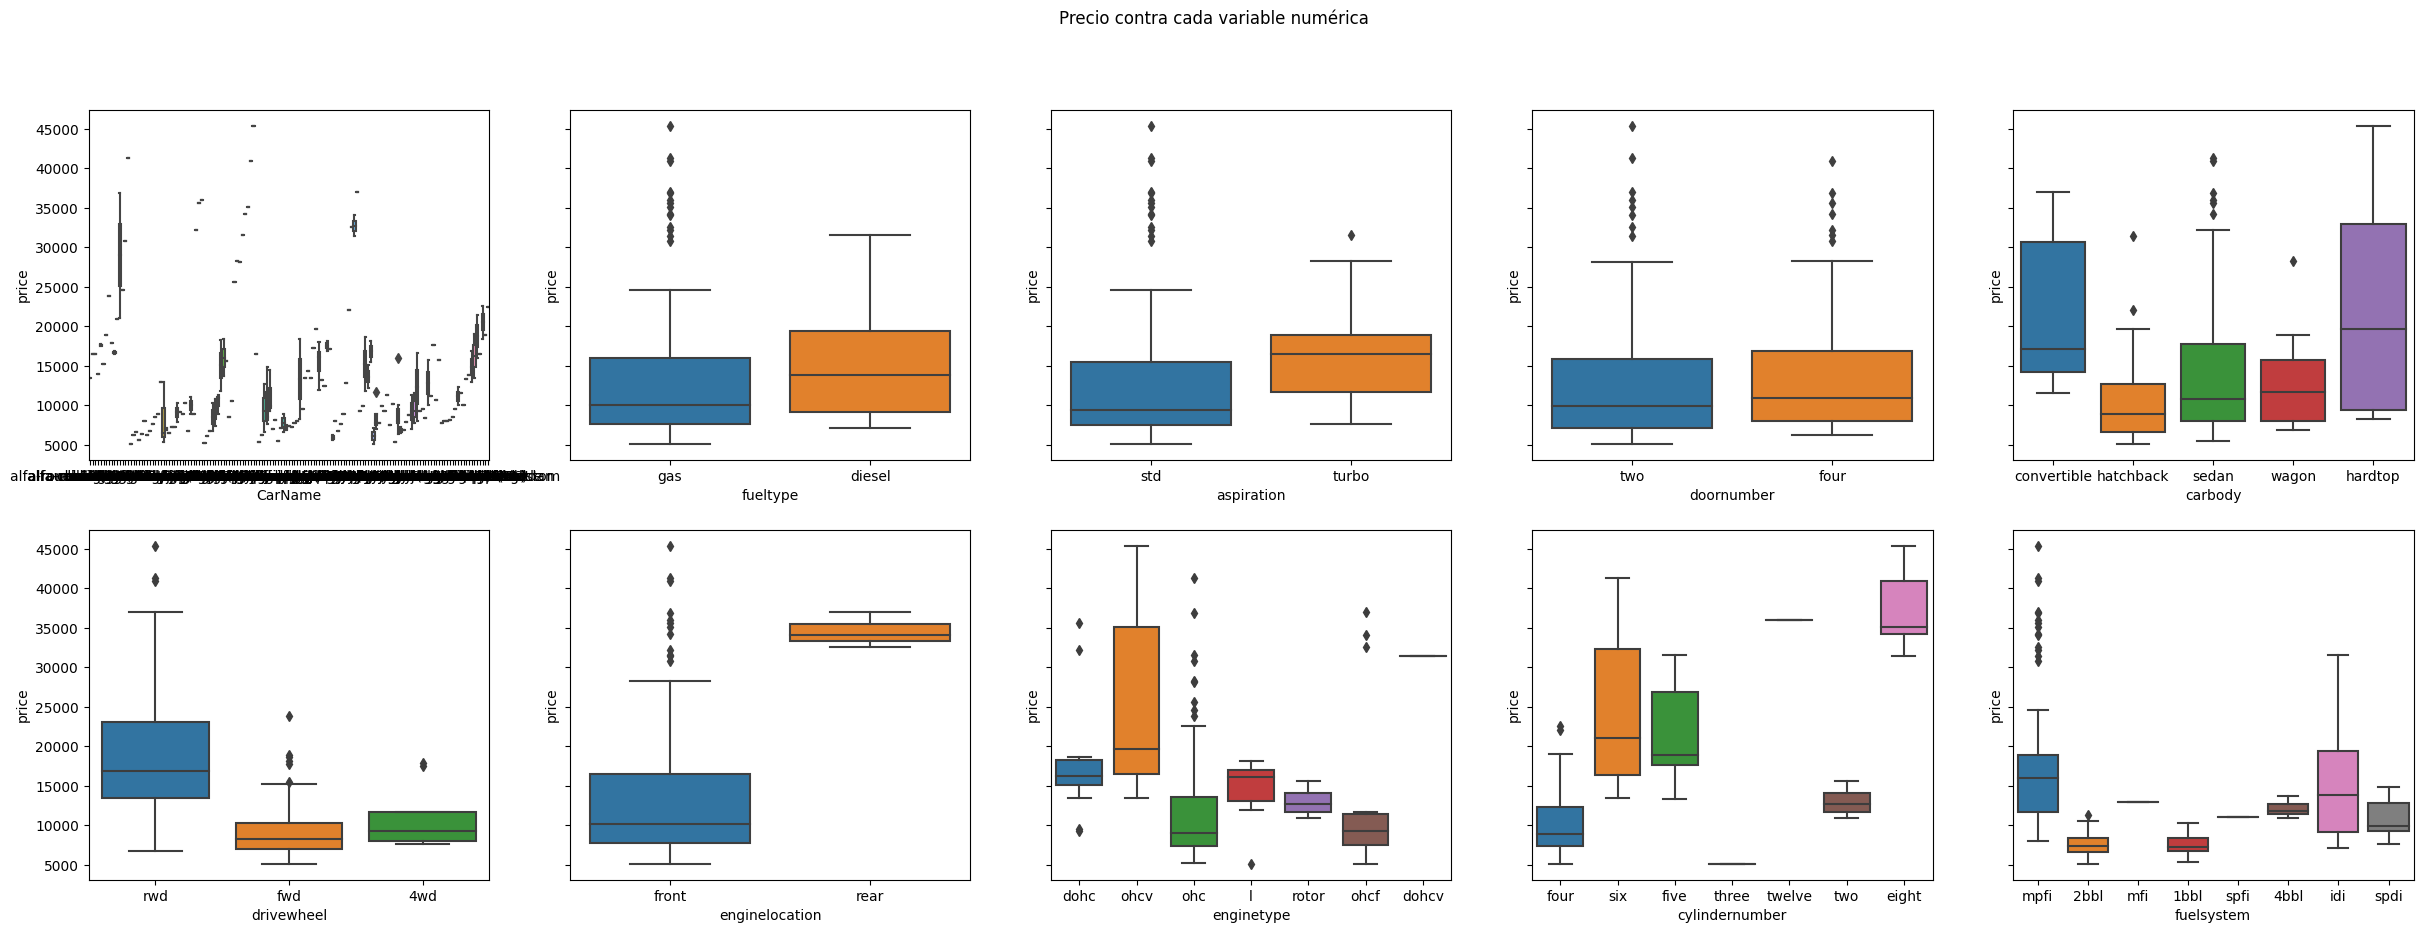

In [19]:
fig,axes=plt.subplots(2,5,figsize=(30, 10),sharey=True)
k=0
for i in range(len(axes)):
  for j in range(5):
    sns.boxplot(data=df, x=Lad[k], y="price", ax=axes[i,j])
    k+=1
fig.suptitle("Precio contra cada variable categórica")
plt.show()

In [76]:
#Define que variables numericas y categoricas usarás para crear tu modelo lineal.
use_vars=["symboling","carlength", "curbweight", "boreratio", "horsepower","citympg","aspiration","drivewheel","enginelocation","enginetype","cylindernumber"]
categorical_vars=["aspiration","drivewheel","enginelocation","enginetype","cylindernumber"]

In [61]:
X_numeric["symboling"]

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [63]:
X_categorical["aspiration"]

0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object

In [78]:
df=df[use_vars]
df=pd.get_dummies(df,columns=categorical_vars,drop_first=True)

In [247]:
df

,symboling,carlength,curbweight,boreratio,horsepower,citympg,aspiration_turbo,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,168.8,2548,3.47,111,21,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,3,168.8,2548,3.47,111,21,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,171.2,2823,2.68,154,19,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,2,176.6,2337,3.19,102,24,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2,176.6,2824,3.19,115,18,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,188.8,2952,3.78,114,23,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
201,-1,188.8,3049,3.78,160,19,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
202,-1,188.8,3012,3.58,134,18,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
203,-1,188.8,3217,3.01,106,26,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0


<Axes: >

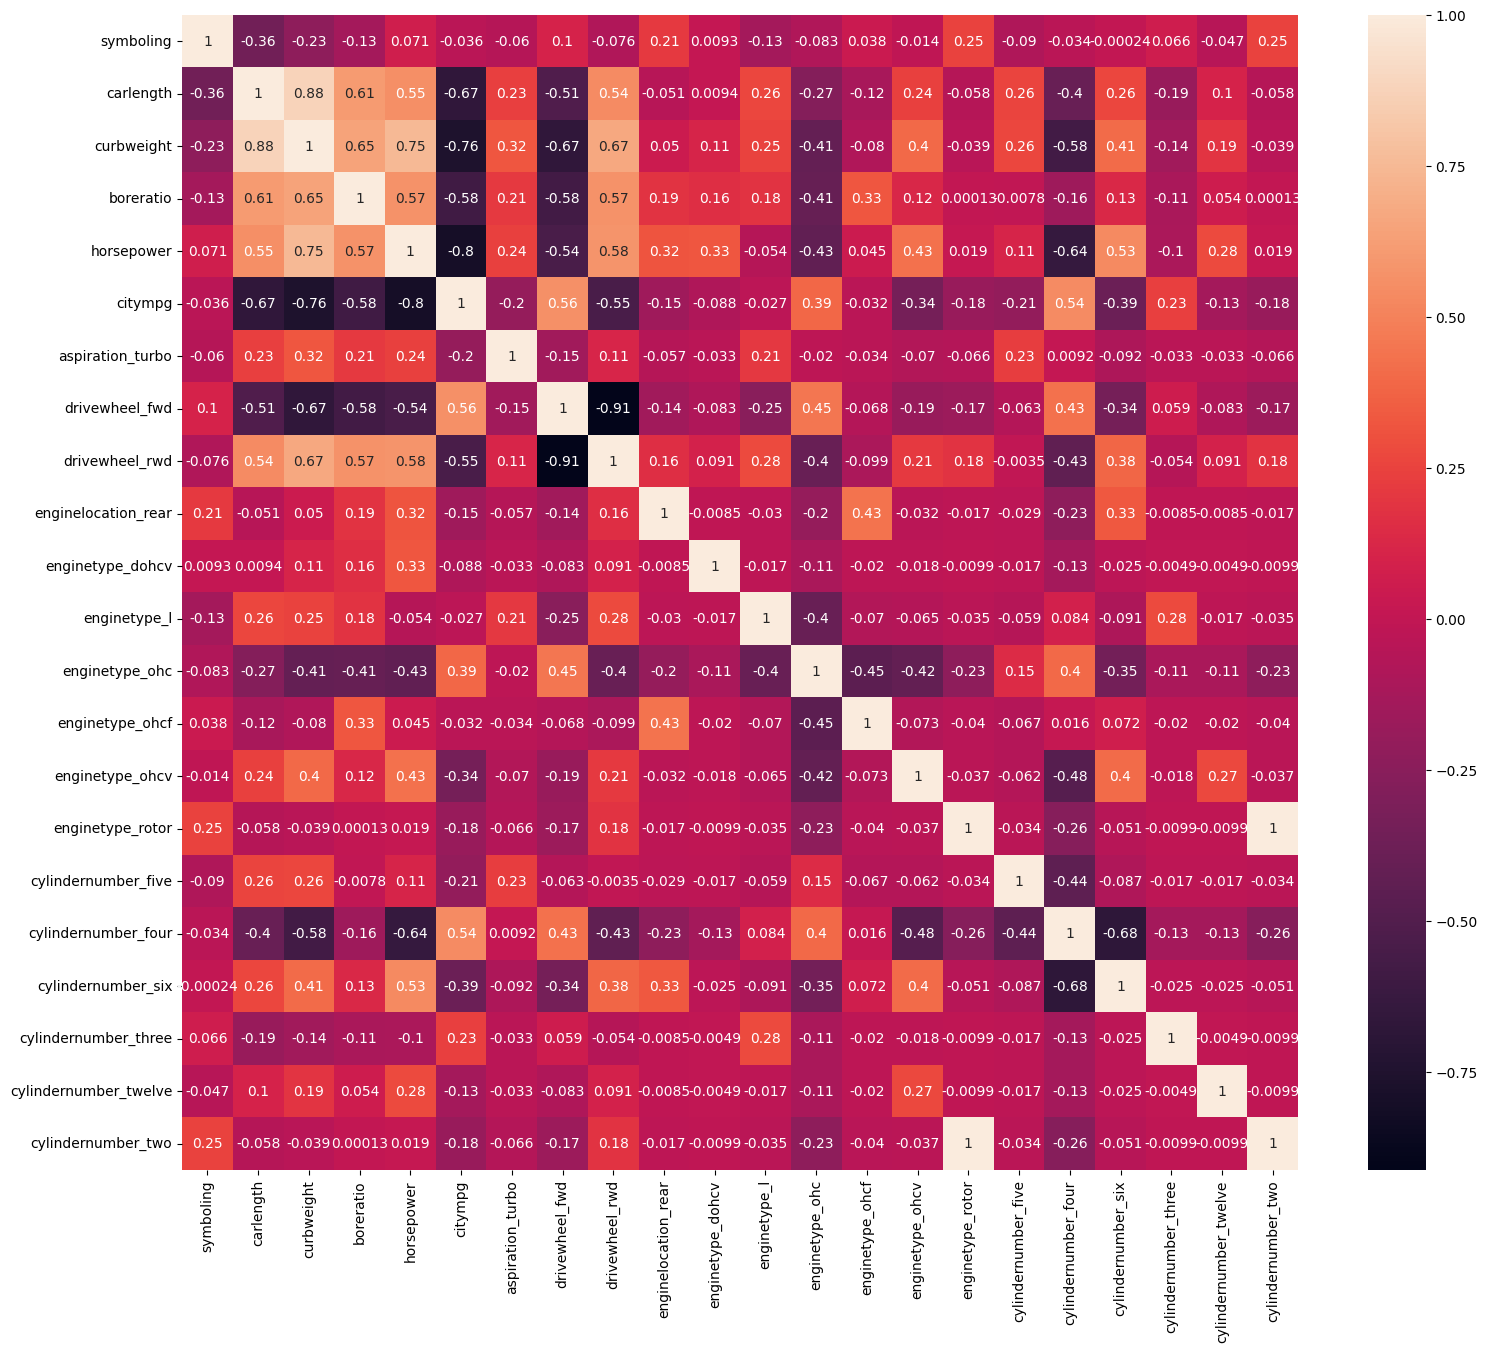

In [80]:
fig,ax=plt.subplots(1,1,figsize=(18,15))
sns.heatmap(df.corr(),annot=True)

In [176]:
#Construye la matriz de caracteristicas X y el vector de target t.
Xc=[]
Tc=np.asarray(Y)

In [182]:
df["symboling"].size

205

In [223]:
NewLabels=["symboling",	"carlength",	"curbweight",	"boreratio",	"horsepower",	"citympg",	"aspiration_turbo",	"drivewheel_fwd",	"drivewheel_rwd","enginelocation_rear", "enginetype_dohcv", "enginetype_l","enginetype_ohc",	"enginetype_ohcf",	"enginetype_ohcv",	"enginetype_rotor",	"cylindernumber_five",	"cylindernumber_four",	"cylindernumber_six",	"cylindernumber_three",	"cylindernumber_twelve",	"cylindernumber_two"]

In [233]:
X0 = np.asarray(df[NewLabels[0]])
for i in range(len(df["symboling"])):
  if i == 1:
    XT = np.vstack((X0,np.asarray(df[NewLabels[i]])))
  elif i > 1 and i <22 :
    XT = np.vstack((XT,np.asarray(df[NewLabels[i]])))


In [235]:
XT.shape

(22, 205)

In [302]:
#Normaliza las caracteristicas y procede a generar el modelo.
scaler = StandardScaler()
Xc_norm = scaler.fit_transform(XT)

In [327]:
XcT = np.transpose(Xc_norm)

In [320]:
TCC = TTT.reshape(1,205)

In [321]:
TCC.shape

(1, 205)

In [266]:
#Función costo
def L(x,y,w):
  for i in range(len(w)):
    if i==0:
      f = w[0]
    else:
      f += w[i]*x[i-1,:]
  costo= np.sum((f-y)**2)
  costo/=(2*len(x[0,:]))
  return costo

In [270]:
#derivada
def D(x,y,w):
  dw = np.zeros(len(w))
  f=0
  for i in range(len(w)):
    if i== 0:
      f = w[0]
    else:
      f += w[i]*x[i-1,:]
  for j in range(len(w)):
    if i== 0:
      dw[0] = np.sum((f-y))/len(x)
    else:
      dw[j] = np.sum((f-y)*x[j-1,:])/len(x)
  return dw

In [271]:
#método gradiente descendiente
def graddec(x,y,w,alph,iter,V,D):
  cost=[]
  for i in range(iter):
    dj=D(x,y,w)
    for j in range(len(w)):
      w[j] = w[j]-alph*dj[j]
    cost.append(V(x,y,w))
  return w, cost

In [350]:
w=np.zeros(22)
iteraciones = 10000
alph=1e-5
wf, cost=graddec(Xc_norm,Tc,w, alph, iteraciones, L,D)
wf

array([-140.57770987, -142.38713109, -202.32143938, 2805.09028787,
       -141.85684009,  159.27683966, -225.73986913, -139.77765698,
       -145.03161357, -136.99533766, -140.07257721, -140.46901848,
       -140.48711847, -143.22742004, -140.55119304, -139.6101338 ,
       -140.57770987, -139.94314092, -144.81903392, -138.76036155,
       -140.70028055, -140.4615419 ])

In [351]:
for i in range(len(wf)):
    if i==0:
      fw = wf[0]
    else:
      fw += wf[i]*Xc_norm[i-1,:]

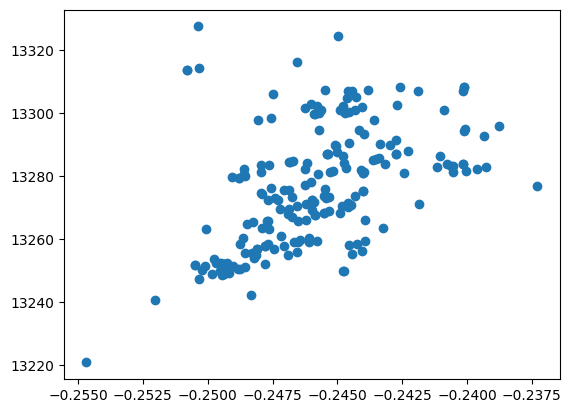

In [364]:
plt.scatter(Xc_norm[21,:],fw)

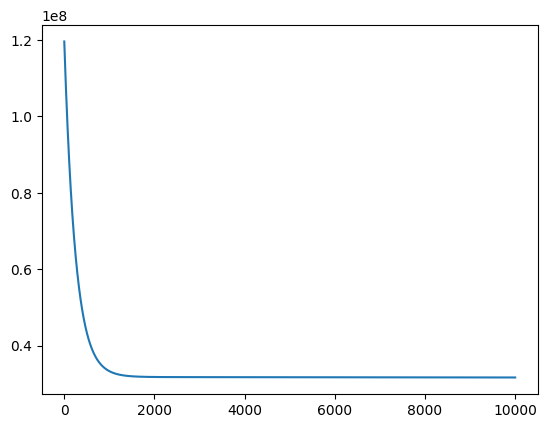

In [296]:
plt.plot(range(iteraciones),cost)

In [341]:
# Usa el 20% de los datos como conjunto de validación
X_train, X_test, y_train, y_test = train_test_split(XcT, Tc, test_size=0.20, random_state=42)

In [342]:
# Utiliza Keras () para que puedas analizar la dependencia de la función costo como función del parametro de aprendizaje, para diferentes valores, y decidas cual usar.
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()

In [343]:
input_dim = 22
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 23        
                                                                 
Total params: 23 (92.00 Byte)
Trainable params: 23 (92.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [344]:
num_epochs = 100
batch_size =X_train.shape[0] #30
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 278ms/step - loss: 234520768.0000
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 110655840.0000
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 74520992.0000
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 63976880.0000
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 60897512.0000
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 59995616.0000
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 59728872.0000
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 59647412.0000
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 59619996.0000
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 59608340.0000
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 59601288.0000
Epoch 12/100
1/1 [==============================] - 0s

In [345]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[-125.4381  ]
 [-478.66107 ]
 [2648.6536  ]
 [-129.91391 ]
 [ 393.35385 ]
 [-328.2284  ]
 [-121.45819 ]
 [-133.26962 ]
 [-116.41219 ]
 [-122.082184]
 [-122.32547 ]
 [-122.65011 ]
 [-130.7644  ]
 [-123.110985]
 [-120.70186 ]
 [-122.99993 ]
 [-122.5498  ]
 [-133.20558 ]
 [-119.47061 ]
 [-123.08818 ]
 [-122.3507  ]
 [-123.52535 ]] [576.14624]


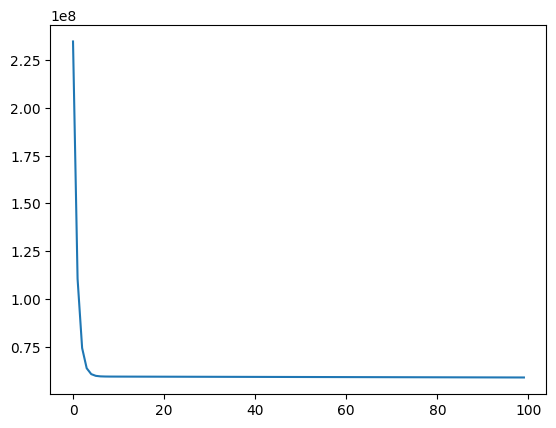

In [346]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();

In [132]:
# Posteriormente utiliza scikit-learn para comprobar tu resultado

In [348]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=1e-5)
sgdr.fit(XcT, Tc)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(eta0=1e-05, learning_rate='constant')
number of iterations completed: 1000, number of weight updates: 205001.0


In [349]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [578.44478607], b:[-125.73955624 -513.98105266 2662.19774316 -128.18657907  390.23611795
 -346.80389142 -118.91261121 -131.18918773 -113.02913128 -119.3433516
 -120.20041806 -120.30776623 -127.38502877 -120.48925622 -118.37892387
 -120.46382977 -119.10322633 -130.97760477 -116.58116015 -120.71447286
 -120.1829831  -120.46382977]


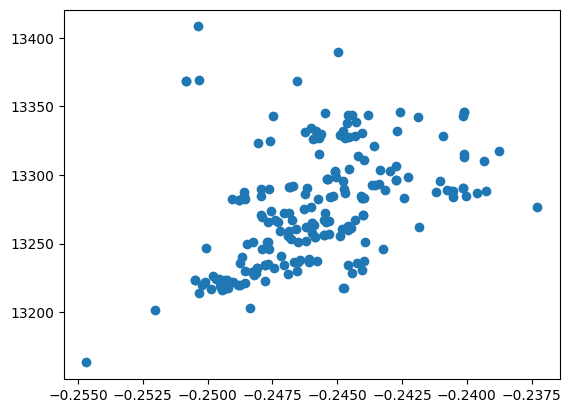

In [370]:
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*XcT[:,i]

plt.scatter(XcT[:,21],yp)